# **Module 2: Appreciating, Interpreting and Visualizing Data**
# **PROJECT**

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

* A simple Exploratory Data Anaysis is done for this project.
* The Raw data consists of:
  - age    
  - sex    
  - chest pain type (4 values)    
  -resting blood pressure    
  -serum cholestoral in mg/dl    
  -fasting blood sugar > 120 mg/dl    
  -resting electrocardiographic results (values 0,1,2)    
  -maximum heart rate achieved    
  -exercise induced angina   
  -oldpeak = ST depression induced by exercise relative to rest    
  -the slope of the peak exercise ST segment    
  -number of major vessels (0-3) colored by flourosopy    
  -:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## **Data preparation**

In [6]:
## comparing rest of the parameters/columns present in the data with respect to presence or absence of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

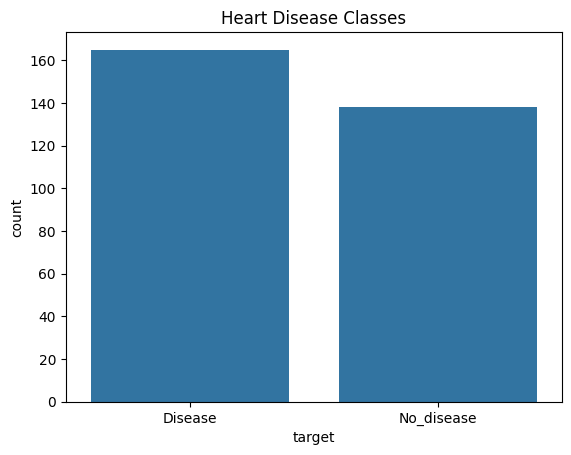

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

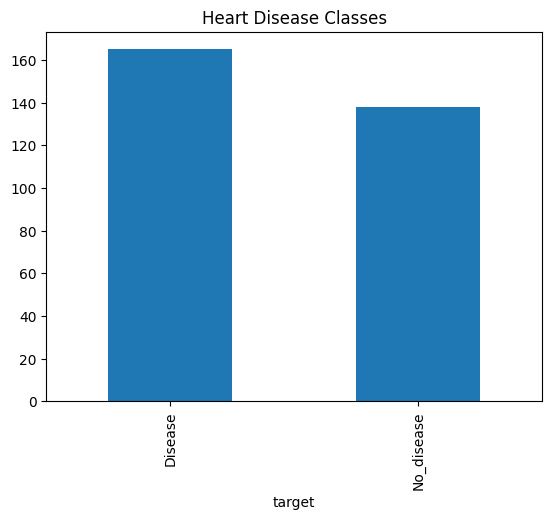

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

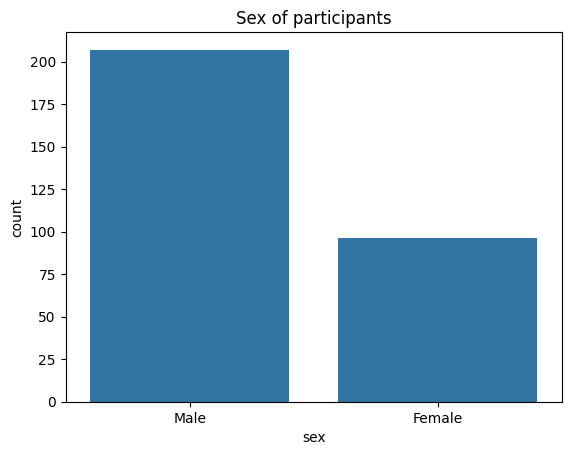

In [11]:
## barplot indicating the the sex of the participants
sns.barplot(data['sex'].value_counts())
plt.title("Sex of participants")
plt.show()

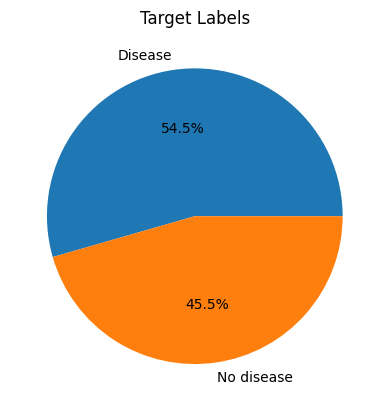

In [13]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

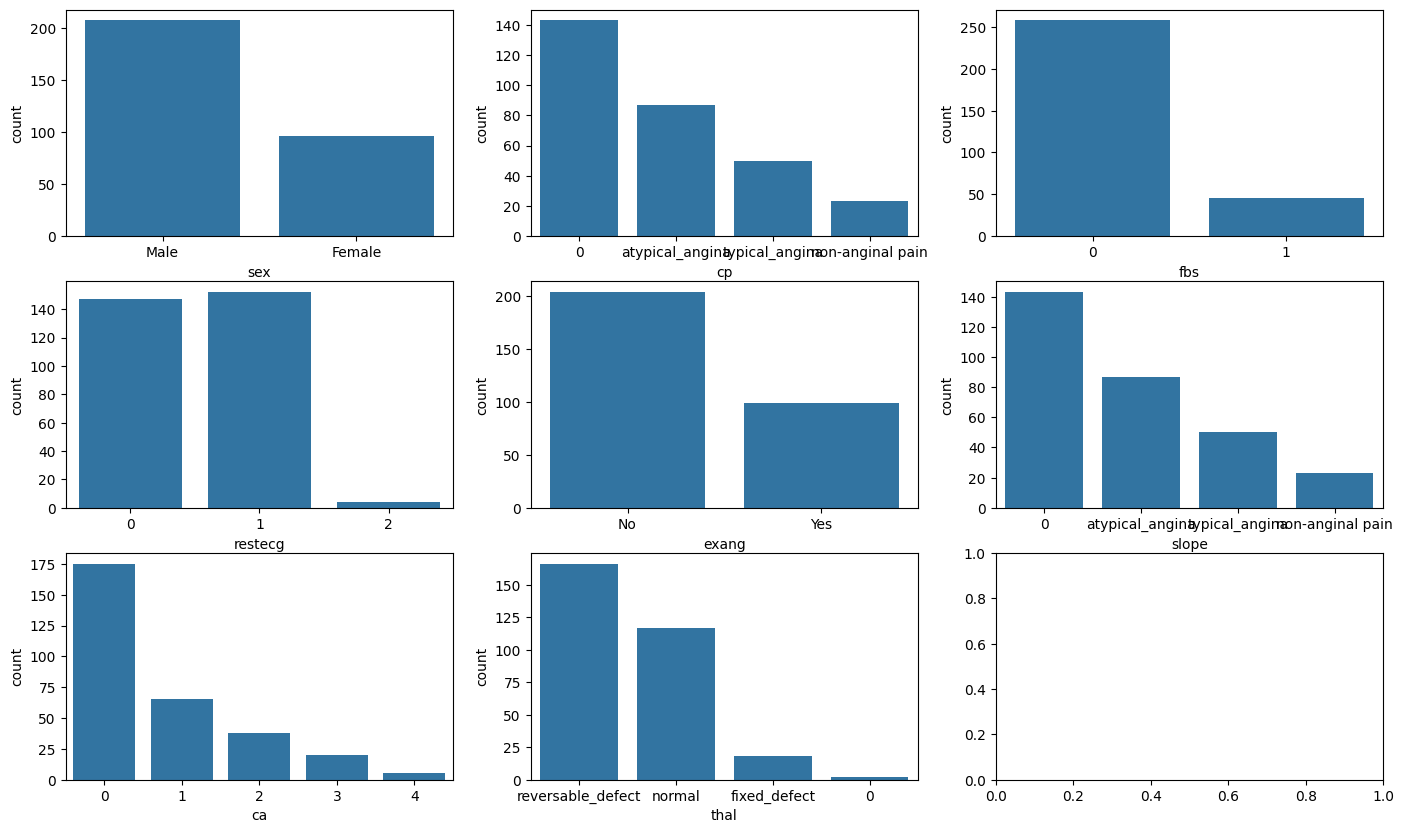

In [12]:
# plotting the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

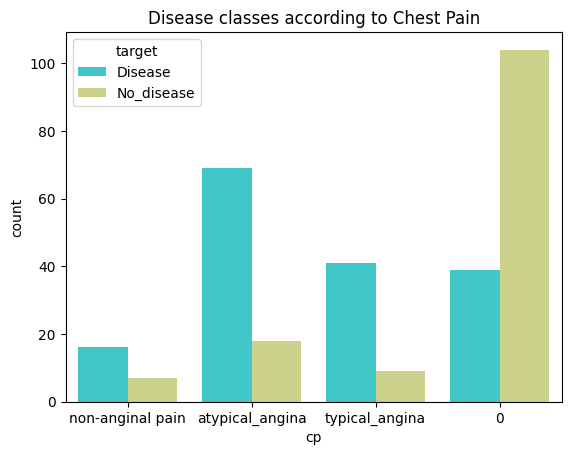

In [14]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

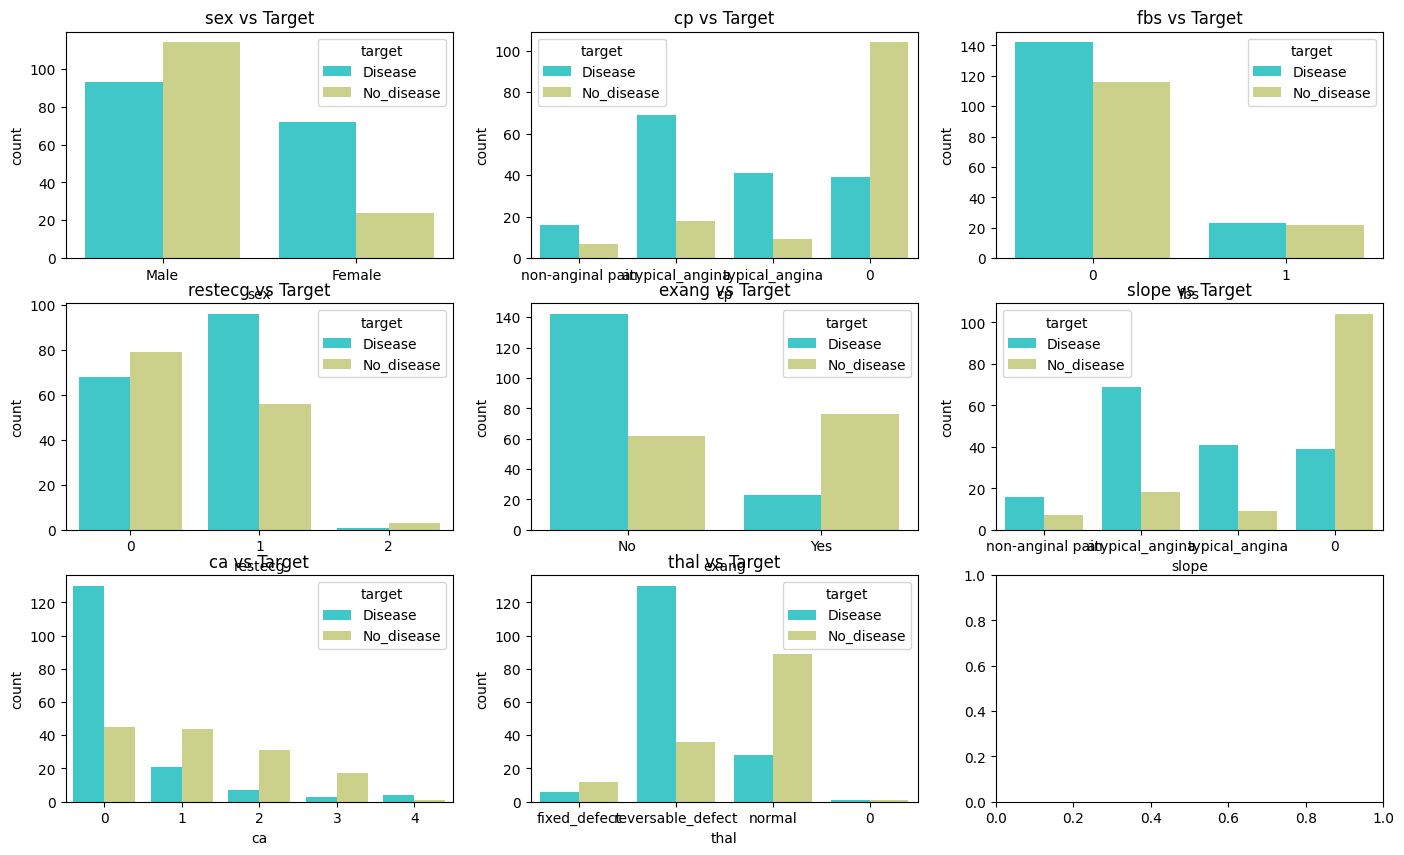

In [21]:
# now lets visualize count of all variables w.r.t the presence of disease together:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, palette='rainbow', ax=ax)
    ax.set_title(f'{feature} vs Target')


In [22]:
# Visualising the distribution of the continous variables

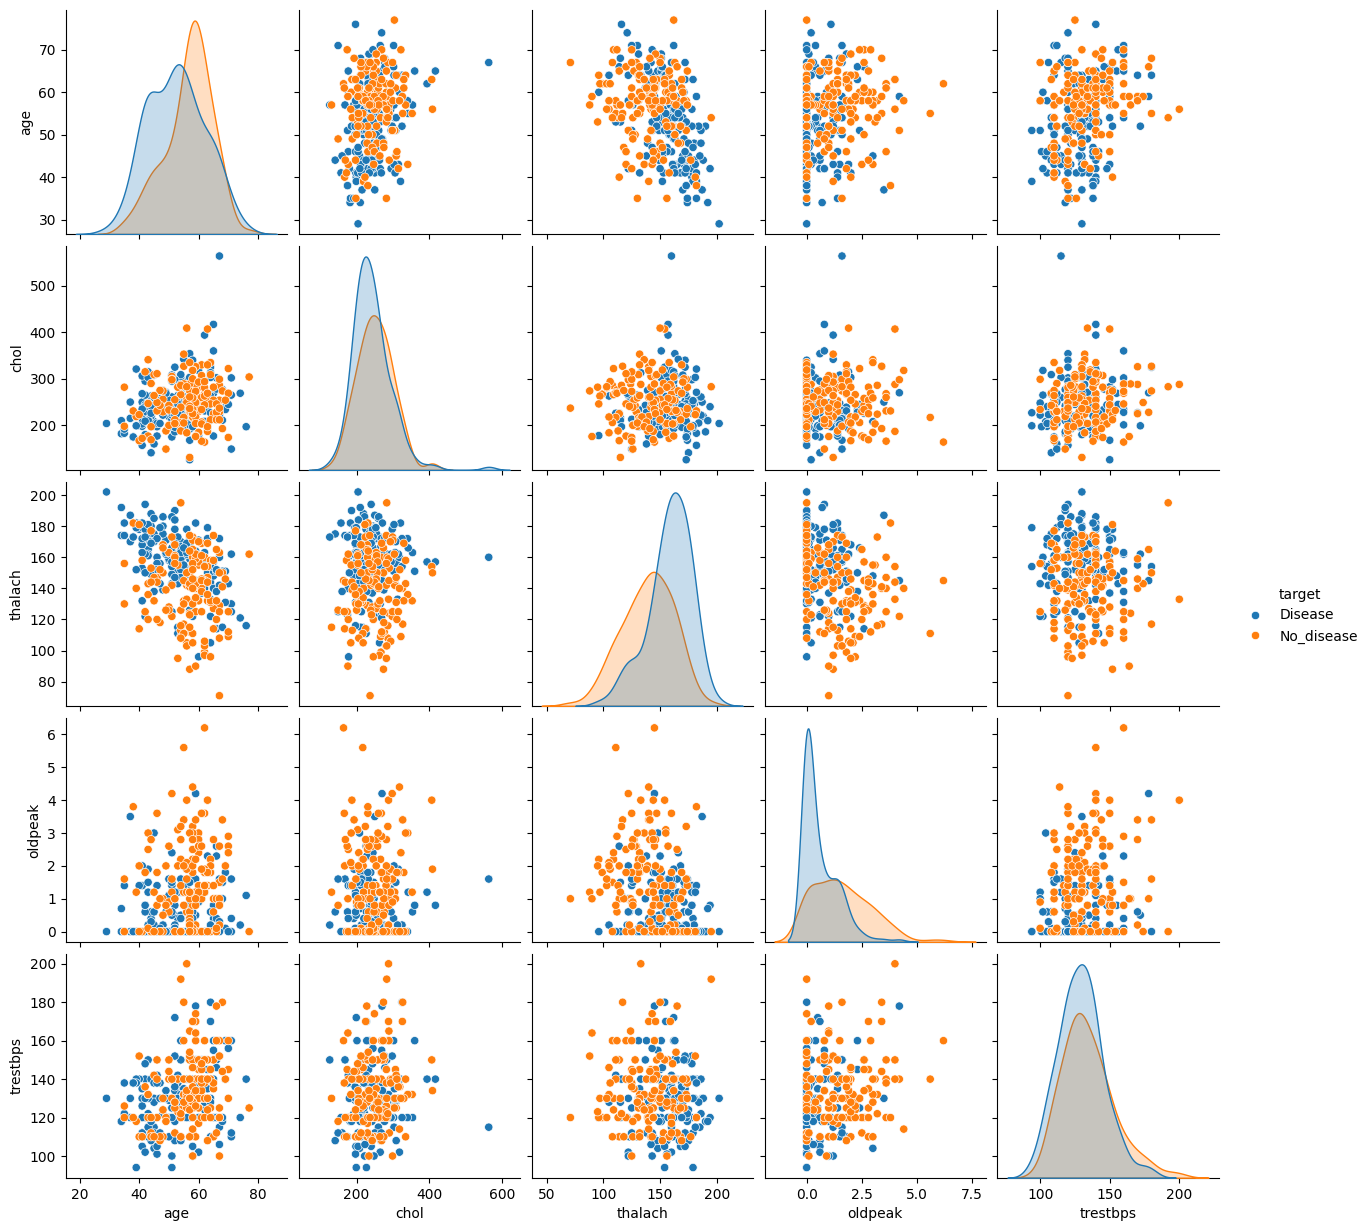

In [23]:
## pair plots can automotically be used to view the pair-wise relationship between all the  features that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

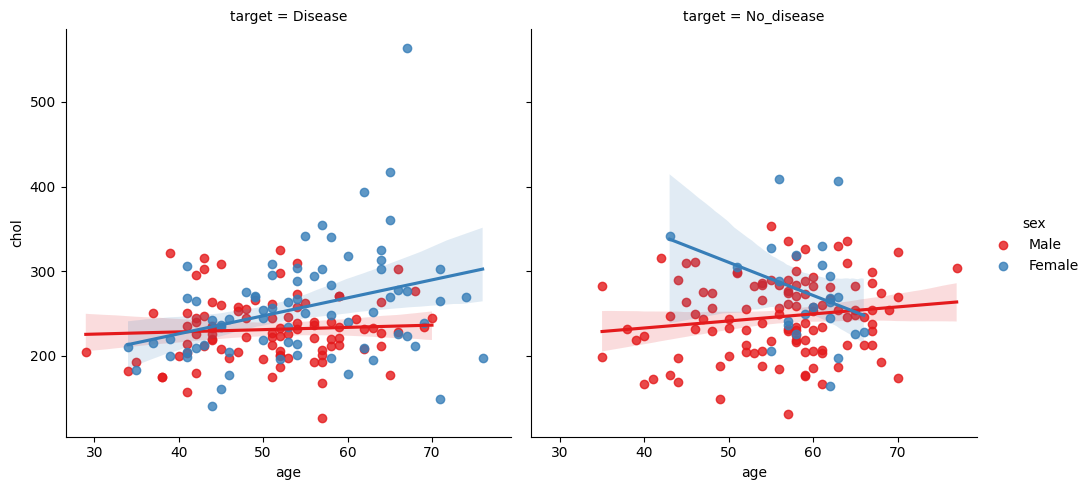

In [24]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",data=data)
plt.show()

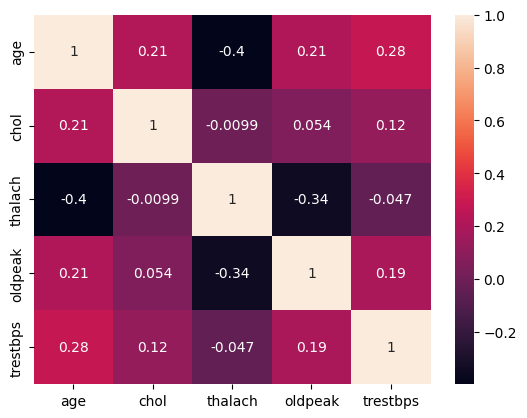

In [25]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

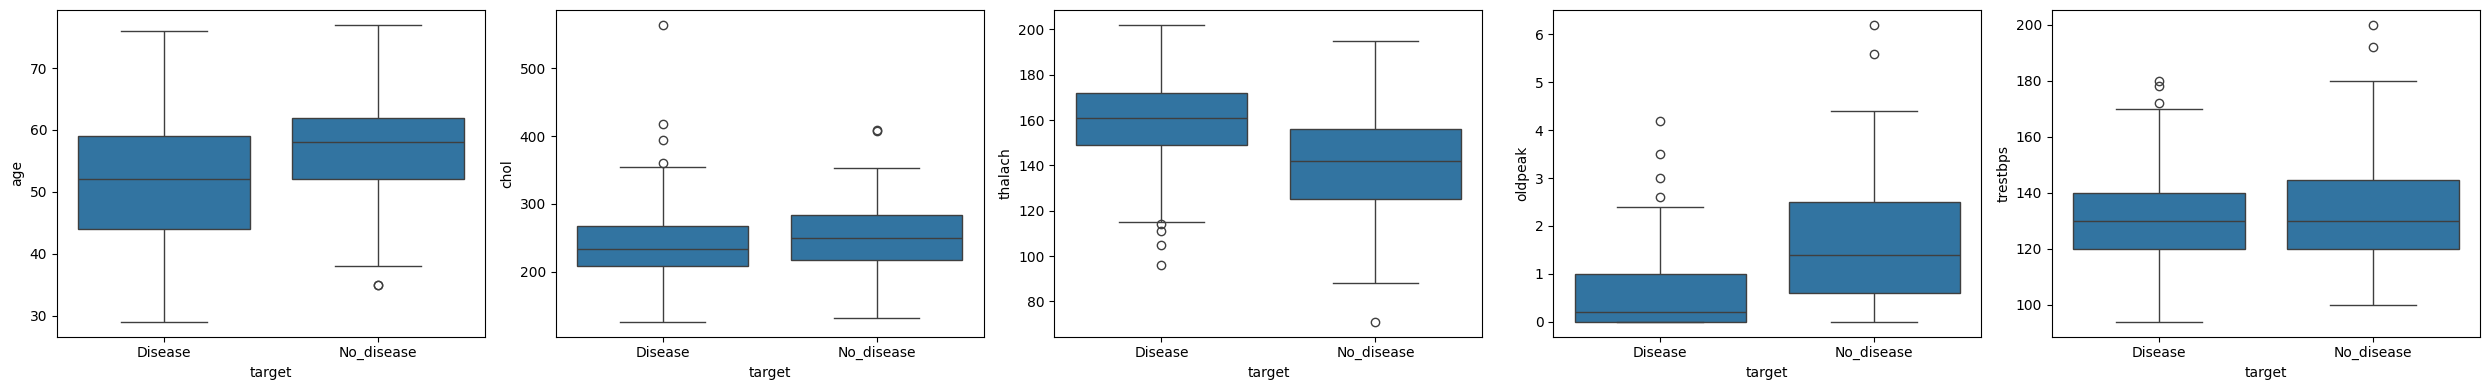

In [26]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

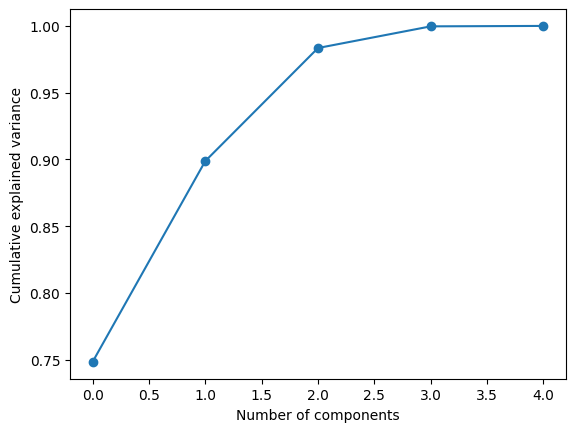

In [29]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

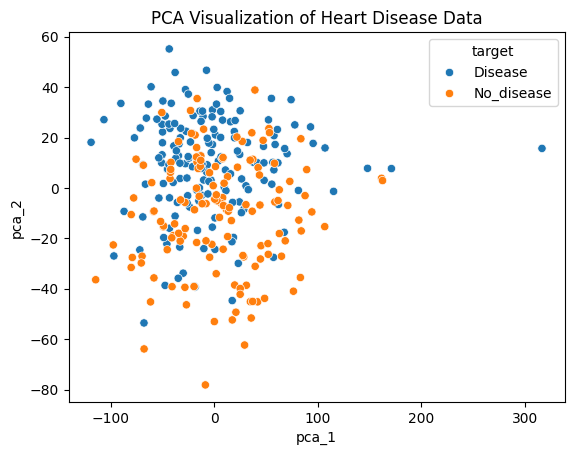

In [30]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


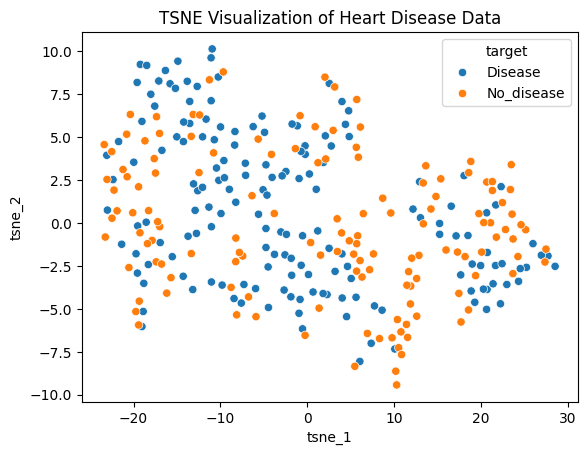

In [31]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

In [32]:
# Percentage of samples with the disease
# Count the number of samples with 'Disease'
disease_count = data['target'].value_counts()

# Calculate percentage of samples with Disease
percentage_disease = (disease_count['Disease'] / len(data)) * 100
print(f"Percentage of samples with Disease: {percentage_disease:.2f}%")

Percentage of samples with Disease: 54.46%


In [33]:
# 3 continuous features that show a significant statistical difference in distribution with respect to the presence and absence of the disease?
from scipy.stats import ttest_ind

# Select continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Perform t-tests for each feature
for feature in continuous_features:
    disease = data[data['target'] == 'Disease'][feature]
    no_disease = data[data['target'] == 'No Disease'][feature]
    stat, p_value = ttest_ind(disease, no_disease)

    # Print features with significant differences (p-value < 0.05)
    if p_value < 0.05:
        print(f'{feature} shows significant difference (p-value = {p_value:.5f})')



### 3. **Can we see a clear separation in terms of the presence/absence of disease in the features obtained from PCA and t-SNE plots?**

- **PCA Plot**: If the PCA plot shows well-separated clusters for the target groups (disease vs. no disease), it indicates clear separation.
- **t-SNE Plot**: t-SNE is non-linear and focuses on preserving local structure. If the t-SNE plot shows distinct clusters for each target class, that also indicates a clear separation.

If you have already created the PCA and t-SNE plots, examine the clustering to answer this question. Here’s a guideline:
  - If clusters for `Disease` and `No Disease` are easily distinguishable, then yes, there’s clear separation.
  - If the clusters overlap significantly, the features might not provide a strong separation.

### 4. **What is the optimal number of principal components in our case?**

The optimal number of principal components can be determined by looking at the **cumulative variance plot** from PCA. The goal is to find the number of components that explain most of the variance (e.g., 90% or 95%).

Here’s how you can decide the optimal number:

- Look at the cumulative variance plot from the PCA section.
- Identify the point where adding more components contributes little to the explained variance (e.g., when cumulative variance plateaus or reaches ~90%).

### 5. **What are the continuous features with the highest correlation with each other?**

To find the continuous features with the highest correlation, you can calculate the **correlation matrix** and identify the highest correlated pairs.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [35]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [36]:
data = pd.read_csv("star_nutri_expanded.csv")

In [37]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [38]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [39]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [40]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [42]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [43]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [44]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [45]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [46]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [47]:

data = data.replace({True: 1, False: 0})


<ipython-input-47-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [48]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-48-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [49]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

from matplotlib import pyplot as plt
_df_0['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Trans Fat (g)'].plot(kind='hist', bins=20, title='Trans Fat (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sodium (mg)'].plot(kind='hist', bins=20, title='Sodium (mg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Total Carbohydrates (g)'].plot(kind='hist', bins=20, title='Total Carbohydrates (g)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Calories', y='Trans Fat (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Trans Fat (g)', y='Sodium (mg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sodium (mg)', y='Total Carbohydrates (g)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Total Carbohydrates (g)', y='Cholesterol (mg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Calories']
  ys = series['Caffeine (mg)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Calories', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Calories')
_ = plt.ylabel('Caffeine (mg)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Calories']
  ys = series['bev_Brewed Coffee']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Calories', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Calories')
_ = plt.ylabel('bev_Brewed Coffee')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Calories']
  ys = series['bevp_Grande']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Calories', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Calories')
_ = plt.ylabel('bevp_Grande')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Calories']
  ys = series['bevp_Short']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Calories', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Calories')
_ = plt.ylabel('bevp_Short')

from matplotlib import pyplot as plt
_df_12['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Trans Fat (g)'].plot(kind='line', figsize=(8, 4), title='Trans Fat (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Sodium (mg)'].plot(kind='line', figsize=(8, 4), title='Sodium (mg)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Total Carbohydrates (g)'].plot(kind='line', figsize=(8, 4), title='Total Carbohydrates (g)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

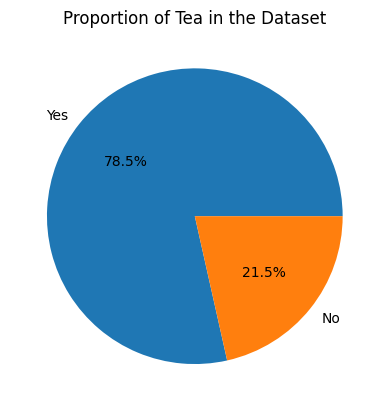

In [51]:
# Pie chart of the 'Tea' column
plt.pie(data['Tea'].value_counts(), labels=["Yes", "No"], autopct='%1.1f%%')
plt.title('Proportion of Tea in the Dataset')
plt.show()

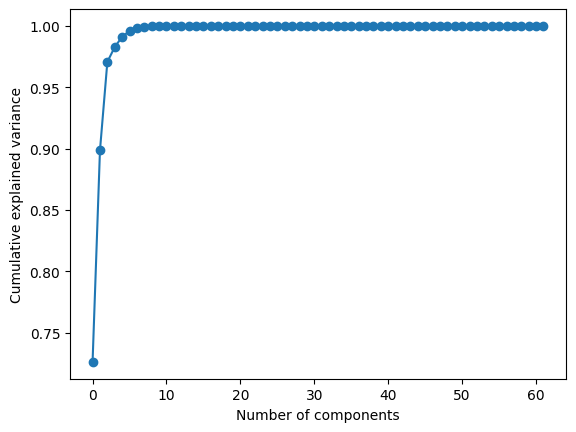

In [52]:
# PCA on the data and plot the explained variace ratio
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

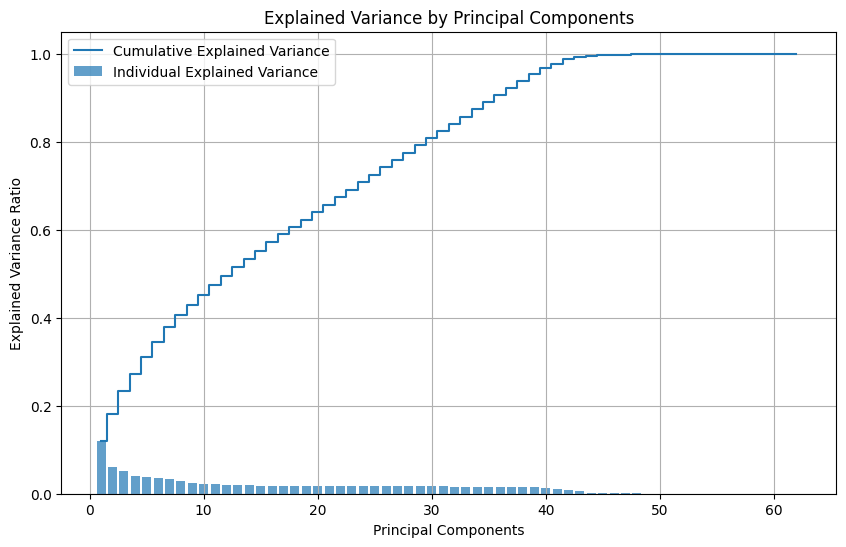

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize the data if not already standardized (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative sum of explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-57-47b6c2eed432>:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="tsne_1", y="tsne_2", data=tsne_df, palette='coolwarm', s=100)


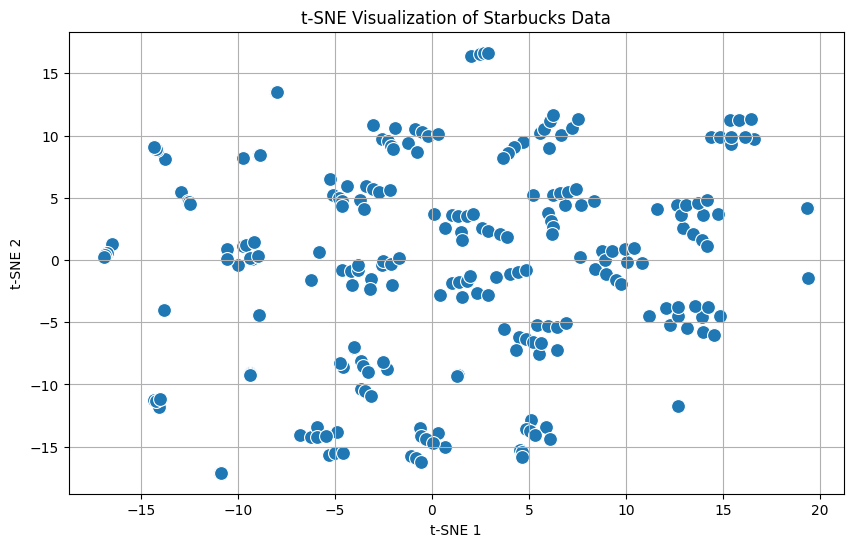

In [57]:
# plotting the first 2 components of tsne, whats you observation from the plot?
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for t-SNE
numeric_data = data.select_dtypes(include=[float, int])

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_data = tsne.fit_transform(numeric_data_scaled)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
})

# Visualize the t-SNE results with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tsne_1", y="tsne_2", data=tsne_df, palette='coolwarm', s=100)
plt.title("t-SNE Visualization of Starbucks Data")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


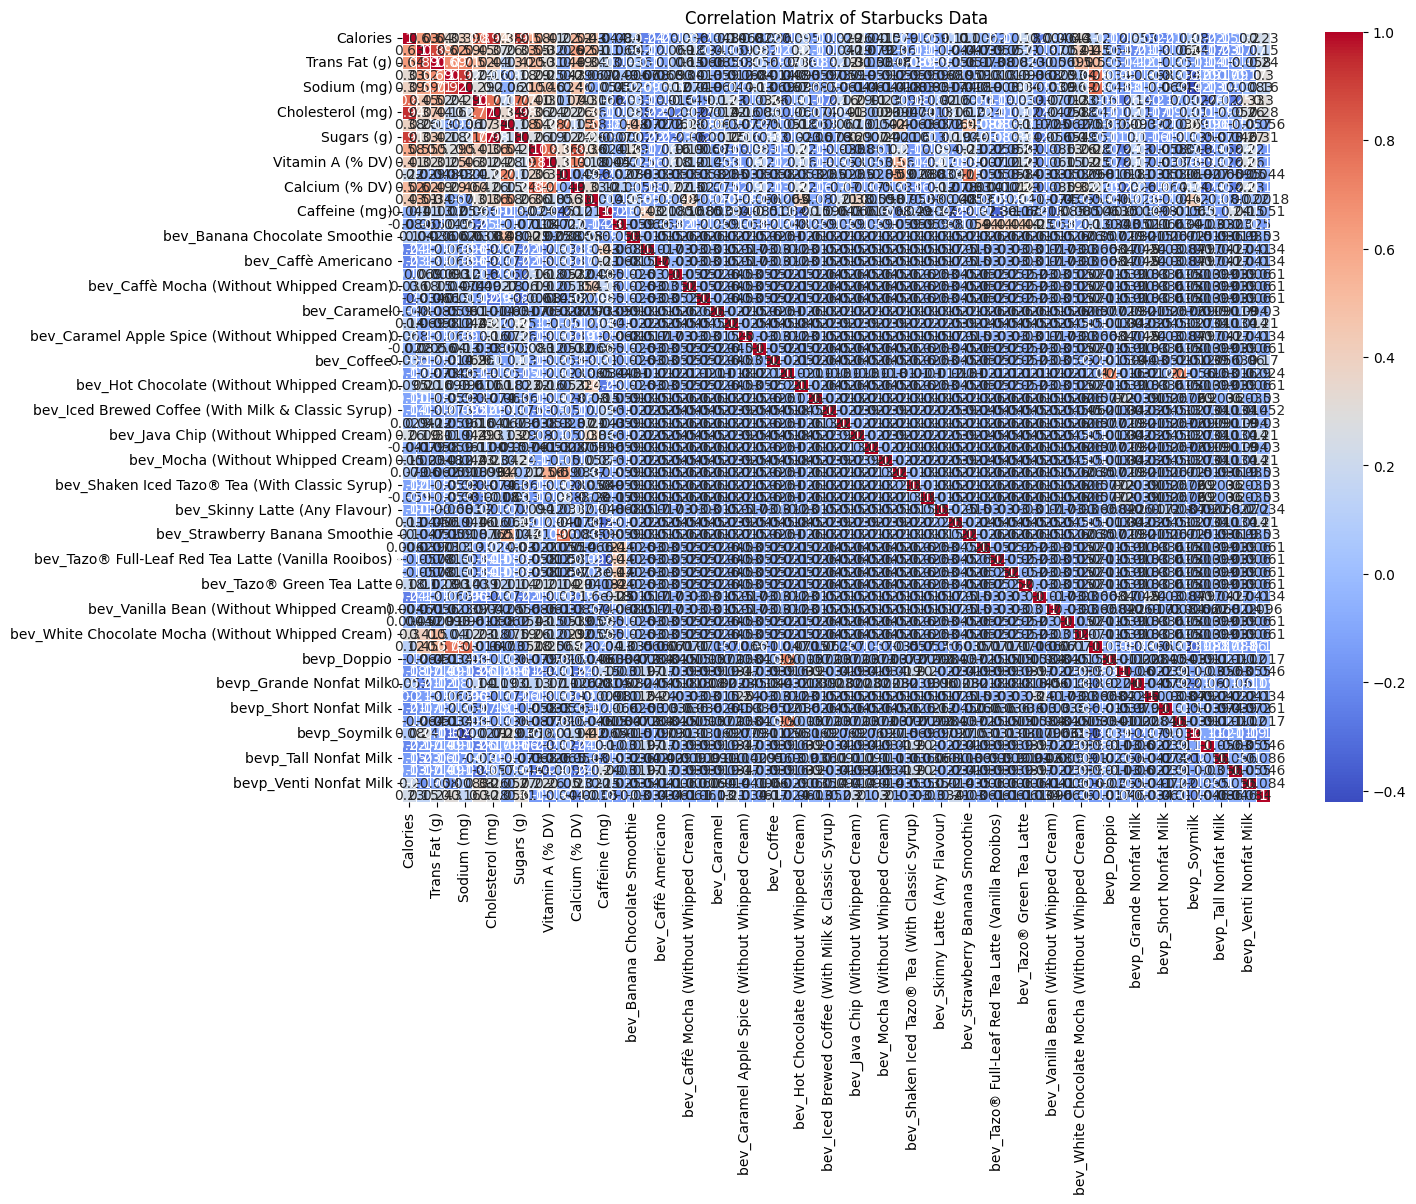

In [62]:
# correlation matrix and the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Starbucks Data")
plt.show()

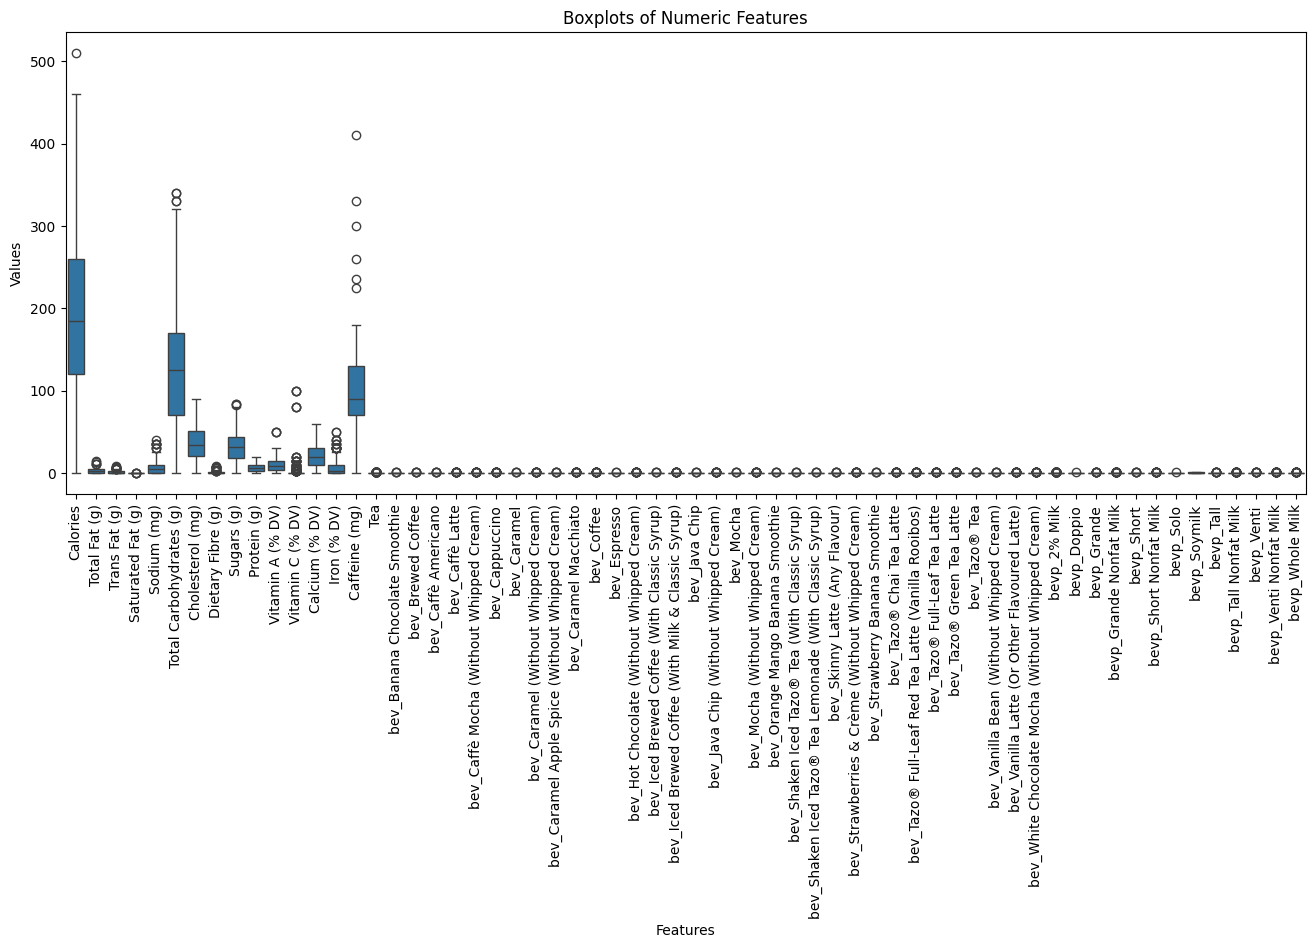

In [64]:
# boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?

# Select numeric columns for the boxplot
numeric_data = data.select_dtypes(include=[float, int])

# Melt the DataFrame for seaborn
melted_data = numeric_data.melt(var_name='Features', value_name='Values')

# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

# Create a boxplot for each numeric feature, displayed side by side
sns.boxplot(x='Features', y='Values', data=melted_data)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Features")
plt.show()


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.